In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

os.chdir("/Users/julianacavalcanti/Documents/Year 3/Programming and Numerical Methods for Economics/Python_learning")
!pip install xlrd
!pip install quantecon

# Problem set 3


## Exercise 1

## a)


In [5]:
## Run OLS regression many times
import statsmodels.api as sm

np.random.seed(123)


N = 100


x2 = np.random.normal(0, 1, N)

e = np.random.normal(0, 5, N)

# 5. Generate y = 2 + 0.5*x2 + e
y = 2 + 0.5 * x2 + e

# 6. Add constant term for intercept and run OLS
X = sm.add_constant(x2)
model = sm.OLS(y, X).fit()

# 7. Print summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.9226
Date:                Tue, 14 Oct 2025   Prob (F-statistic):              0.339
Time:                        17:50:58   Log-Likelihood:                -299.78
No. Observations:                 100   AIC:                             603.6
Df Residuals:                      98   BIC:                             608.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9046      0.490      3.887      0.000       0.932       2.877
x1             0.4170      0.434      0.961      0.339      -0.445       1.279
==============================================================================
Omnibus:                        5.027   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.131
Skew:                          -0.308   Prob(JB):                       0.0769
Kurtosis:                       3.924   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## b)

Monte Carlo results for β1_hat (slope):
  Type of distribution (expected): Approximately Normal
  MC E[β1_hat] ≈ 0.5002
  MC Var[β1_hat] ≈ 0.2595
  MC SD[β1_hat] ≈ 0.5094
  Theoretical Var[β1_hat] (rough, E[Sxx]≈N-1): ≈ 0.2525


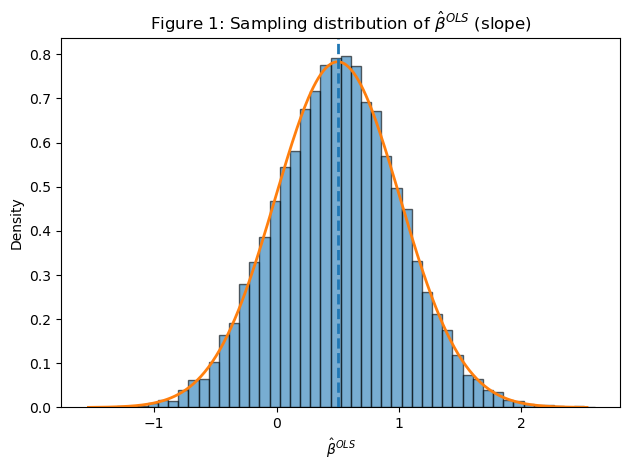

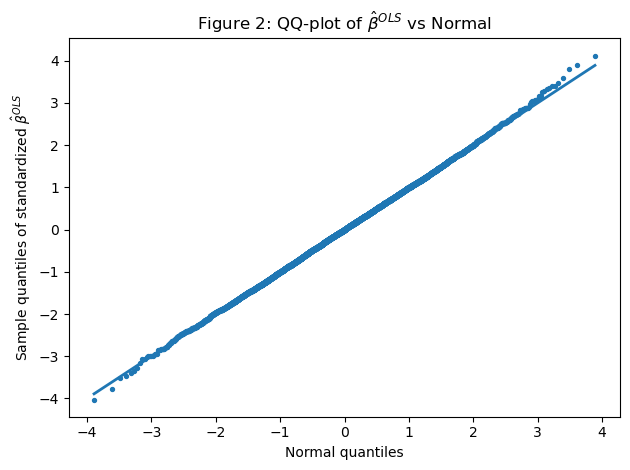

In [7]:
from scipy.stats import norm
# ----- Setup -----
np.random.seed(123)
T = 10_000          # number of Monte Carlo replications
N = 100             # sample size per replication
beta0_true = 2.0
beta1_true = 0.5
sigma = 5.0         # sd of errors (variance = 25)

# ----- Storage for estimates -----
beta1_hats = np.empty(T)

# ----- Monte Carlo loop -----
for t in range(T):
    x = np.random.normal(0, 1, N)         # x2 ~ N(0,1)
    e = np.random.normal(0, sigma, N)     # e ~ N(0,25)
    y = beta0_true + beta1_true * x + e

    x_bar = x.mean()
    y_bar = y.mean()
    sxx = np.sum((x - x_bar)**2)
    sxy = np.sum((x - x_bar) * (y - y_bar))

    b1 = sxy / sxx
    beta1_hats[t] = b1

# ----- Monte Carlo summaries -----
mc_mean = beta1_hats.mean()
mc_var  = beta1_hats.var(ddof=1)  # unbiased sample variance
mc_sd   = np.sqrt(mc_var)

print("Monte Carlo results for β1_hat (slope):")
print(f"  Type of distribution (expected): Approximately Normal")
print(f"  MC E[β1_hat] ≈ {mc_mean:.4f}")
print(f"  MC Var[β1_hat] ≈ {mc_var:.4f}")
print(f"  MC SD[β1_hat] ≈ {mc_sd:.4f}")

# (Optional) theoretical reference using E[Sxx] ≈ N-1 for x ~ N(0,1)
theoretical_var_approx = (sigma**2) / (N - 1)
print(f"  Theoretical Var[β1_hat] (rough, E[Sxx]≈N-1): ≈ {theoretical_var_approx:.4f}")

# ----- Figure 1: Histogram of β1_hat with Normal overlay -----
plt.figure()
bins = 50
plt.hist(beta1_hats, bins=bins, density=True, alpha=0.6, edgecolor='black')
xs = np.linspace(mc_mean - 4*mc_sd, mc_mean + 4*mc_sd, 400)
plt.plot(xs, norm.pdf(xs, loc=mc_mean, scale=mc_sd), linewidth=2)
plt.axvline(beta1_true, linestyle='--', linewidth=2)
plt.title(r"Figure 1: Sampling distribution of $\hat\beta^{OLS}$ (slope)")
plt.xlabel(r"$\hat\beta^{OLS}$")
plt.ylabel("Density")
plt.tight_layout()

# ----- Figure 2: QQ-plot vs Normal -----
# Standardize the estimates and compare to standard normal quantiles
z = (beta1_hats - mc_mean) / mc_sd
z_sorted = np.sort(z)
p = (np.arange(1, T + 1) - 0.5) / T
q_theory = norm.ppf(p)

plt.figure()
plt.scatter(q_theory, z_sorted, s=8)
# 45-degree reference line
q_min, q_max = q_theory[0], q_theory[-1]
plt.plot([q_min, q_max], [q_min, q_max], linewidth=2)
plt.title(r"Figure 2: QQ-plot of $\hat\beta^{OLS}$ vs Normal")
plt.xlabel("Normal quantiles")
plt.ylabel(r"Sample quantiles of standardized $\hat\beta^{OLS}$")
plt.tight_layout()

plt.show()

## c

In [9]:

# --- Parameters ---
np.random.seed(123)
N = 1000              # new sample size
beta0_true = 2.0
beta1_true = 0.5
sigma = 5.0           # sd of errors (Var = 25)

# --- Simulate data ---
x2 = np.random.normal(0, 1, N)       # x2 ~ N(0,1)
e  = np.random.normal(0, sigma, N)   # e ~ N(0,25)
y  = beta0_true + beta1_true * x2 + e

# --- OLS (intercept + x2) ---
X = sm.add_constant(x2)
model = sm.OLS(y, X).fit()

model.summary()

# --- Useful comparisons (slope only) ---
# Observed Sxx and variance formulas
Sxx = np.sum((x2 - x2.mean())**2)
var_b1_conditional_true_sigma = (sigma**2) / Sxx          # Var(b1 | X) using true sigma
se_b1_from_model = model.bse[1]                           # estimated SE from OLS

print("\n--- Slope (beta1) details ---")
print(f"OLS beta1_hat          : {model.params[1]:.4f}")
print(f"SE(beta1_hat) (model)  : {se_b1_from_model:.4f}")
print(f"Var(b1 | X) using true sigma^2 : {var_b1_conditional_true_sigma:.4f}")
print(f"SD(b1 | X) using true sigma^2  : {np.sqrt(var_b1_conditional_true_sigma):.4f}")

# Rough theoretical (unconditional) comparison using E[Sxx] ~ N-1 when x~N(0,1)
var_approx_N100  = 25 / (100 - 1)
var_approx_N1000 = 25 / (1000 - 1)
print("\n--- Rough theoretical comparison (using E[Sxx] ≈ N-1) ---")
print(f"Var(b1) for N=100  ≈ {var_approx_N100:.4f}  (SD ≈ {np.sqrt(var_approx_N100):.4f})")
print(f"Var(b1) for N=1000 ≈ {var_approx_N1000:.4f} (SD ≈ {np.sqrt(var_approx_N1000):.4f})")



--- Slope (beta1) details ---
OLS beta1_hat          : 0.3503
SE(beta1_hat) (model)  : 0.1514
Var(b1 | X) using true sigma^2 : 0.0250
SD(b1 | X) using true sigma^2  : 0.1580

--- Rough theoretical comparison (using E[Sxx] ≈ N-1) ---
Var(b1) for N=100  ≈ 0.2525  (SD ≈ 0.5025)
Var(b1) for N=1000 ≈ 0.0250 (SD ≈ 0.1582)


## Exercise 2


## a)

In [12]:
## apply alpha early on 
## Number of columns equal to t and rows equal to N
## N x (T+1) matrix



def ar_1(T, rho, y0, a, sigma_e):
    '''
    Simulates an AR(1):
        y_{t+1} = a + rho*y_t + e_t
        e_t ~ N(0, sigma_e)
    Returns a 1D array of length T+1 so you keep y0.
    '''
    y = np.empty(T + 1)       # <-- +1 so we include y0
    y[0] = y0
    for t in range(T):
        e = np.random.normal(0, sigma_e)
        y[t + 1] = a + rho * y[t] + e
    return y

In [14]:
y0 = 0
a = 0
sigma_e = 0.25
rho = 0.95
T = 50

y1 = ar_1(T, rho, y0, a, sigma_e)
print(y1)

[ 0.         -0.09868873 -0.34064718 -0.30656149  0.02344169  0.03106456
  0.02149948  0.0369951   0.06529931  0.0037377  -0.23966293  0.15457379
  0.30621825  0.82019069  0.90357014  0.80056865  0.52408104  0.41537805
  0.10637341  0.62551491  0.58998123  0.75699632  0.95963867  1.18188552
  1.75975869  1.64791778  1.52005638  1.48517363  1.59805033  1.56286709
  1.41751092  1.16765103  0.9156811   0.93726522  0.6406824   0.15514013
  0.176193    0.45804083  0.60059153  0.56608999  0.63853595  0.19483023
  0.01267867  0.43156192  0.70601351  0.49281967  0.90675675  0.68194619
  0.44205087  0.80392772  1.09066634]


### b)

In [ ]:
def simulate_ar1_paths(N, T, rho, sigma_e, y0=0.0, seed=None):
    """
    Simulate N independent AR(1) processes for T periods:
        y_{t+1} = rho * y_t + e_t,   e_t ~ N(0, sigma_e^2)

    Parameters
    ----------
    N : int
        Number of independent paths (households).
    T : int
        Number of periods to simulate (excluding the initial y0 column).
    rho : float
        AR(1) coefficient.
    sigma_e : float
        Standard deviation of the shock epsilon_t.
    y0 : float or array-like of shape (N,), default 0.0
        Initial level(s). If scalar, used for all paths; if array, must be length N.
    seed : int, optional
        Random seed for reproducibility.

    Returns
    -------
    Y : ndarray, shape (N, T+1)
        Simulated paths. Column 0 stores the initial values y0.
    """
    rng = np.random.default_rng(seed)

    # Output array: rows=paths, cols=time (include t=0)
    Y = np.empty((N, T + 1), dtype=float)

    # Broadcast/validate y0
    if np.isscalar(y0):
        Y[:, 0] = y0
    else:
        y0 = np.asarray(y0, dtype=float)
        if y0.shape != (N,):
            raise ValueError("y0 must be a scalar or length-N array")
        Y[:, 0] = y0

    # Draw shocks for all paths and periods at once
    E = rng.normal(loc=0.0, scale=sigma_e, size=(N, T))

    # Recurrence
    for t in range(T):
        Y[:, t + 1] = rho * Y[:, t] + E[:, t]

    return Y

### c)

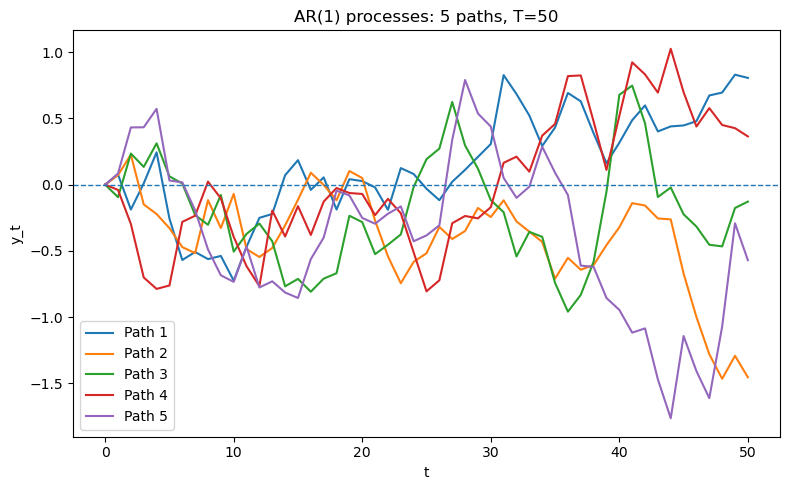

Stationary moments (theoretical):
  E[y_t]      = 0.000000
  Var[y_t]    = 0.641026

Sample moments from simulated data (pooled across paths and time):
  Sample mean = -0.165314
  Sample var  = 0.252750

Per-path sample means: [ 0.1469 -0.3983 -0.2034  0.0112 -0.383 ]
Per-path sample vars : [0.1583 0.1435 0.1589 0.242  0.3449]


In [15]:

# -------- AR(1) simulator (N paths, T periods) --------
def simulate_ar1_paths(N, T, rho, sigma_e, y0=0.0, seed=None):
    """
    y_{t+1} = rho * y_t + e_t,  e_t ~ N(0, sigma_e^2)
    Returns Y with shape (N, T+1); column 0 is y0.
    """
    rng = np.random.default_rng(seed)
    Y = np.empty((N, T + 1), dtype=float)

    # set initial values
    if np.isscalar(y0):
        Y[:, 0] = y0
    else:
        y0 = np.asarray(y0, dtype=float)
        if y0.shape != (N,):
            raise ValueError("y0 must be scalar or length-N")
        Y[:, 0] = y0

    # draw shocks and iterate
    E = rng.normal(0.0, sigma_e, size=(N, T))
    for t in range(T):
        Y[:, t + 1] = rho * Y[:, t] + E[:, t]
    return Y

# -------- Parameters --------
rho = 0.95
sigma_e = 0.25
y0 = 0.0
T = 50
N = 5
seed = 42

# -------- Simulate --------
Y = simulate_ar1_paths(N, T, rho, sigma_e, y0=y0, seed=seed)  # shape (5, 51)

# -------- Plot 5 paths --------
plt.figure(figsize=(8, 5))
for i in range(N):
    plt.plot(range(T + 1), Y[i], label=f'Path {i+1}')
plt.axhline(0.0, linestyle='--', linewidth=1)  # stationary mean
plt.title('AR(1) processes: 5 paths, T=50')
plt.xlabel('t')
plt.ylabel('y_t')
plt.legend()
plt.tight_layout()
plt.show()

# -------- Stationary moments (for |rho|<1) --------
# E[y_t] = 0, Var[y_t] = sigma_e^2 / (1 - rho^2)
stationary_mean = 0.0
stationary_var = sigma_e**2 / (1.0 - rho**2)

print("Stationary moments (theoretical):")
print(f"  E[y_t]      = {stationary_mean:.6f}")
print(f"  Var[y_t]    = {stationary_var:.6f}")

# -------- Sample moments from the simulation --------
# Pool all 5 paths and all time points (including t=0)
sample_mean = Y.mean()
sample_var  = Y.var(ddof=1)  # unbiased sample variance

print("\nSample moments from simulated data (pooled across paths and time):")
print(f"  Sample mean = {sample_mean:.6f}")
print(f"  Sample var  = {sample_var:.6f}")

# (optional) Per-path sample moments
per_path_mean = Y.mean(axis=1)
per_path_var  = Y.var(axis=1, ddof=1)
print("\nPer-path sample means:", np.round(per_path_mean, 4))
print("Per-path sample vars :", np.round(per_path_var, 4))

### d)

Stationary log-earnings y_t:
  Theoretical  E[y] = 0.000000, Var[y] = 0.641026
  Cross-sec    E[y] ≈ -0.008436, Var[y] ≈ 0.643097

Earnings e^{y_t} (lognormal if y is normal):
  Theoretical  E[e^y] ≈ 1.377834, Var[e^y] ≈ 1.705598
  Cross-sec    E[e^y] ≈ 1.367874, Var[e^y] ≈ 1.659510


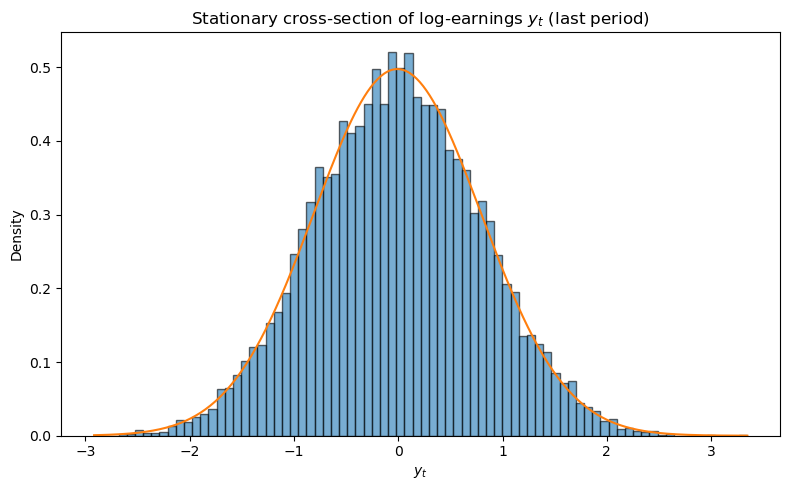

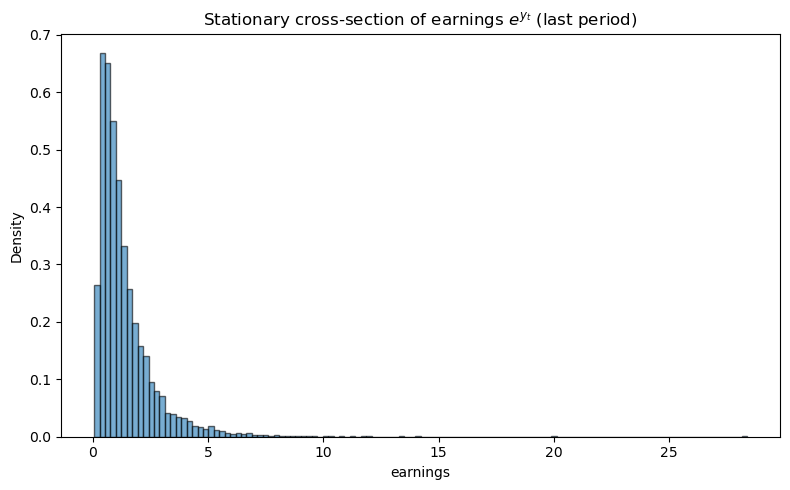

In [16]:

# ------------ Simulator (reused) ------------
def simulate_ar1_paths(N, T, rho, sigma_e, y0=0.0, seed=None):
    """
    y_{t+1} = rho * y_t + e_t,  e_t ~ N(0, sigma_e^2)
    Returns array Y with shape (N, T+1); column 0 is y0.
    """
    rng = np.random.default_rng(seed)
    Y = np.empty((N, T + 1), dtype=float)
    Y[:, 0] = y0 if np.isscalar(y0) else np.asarray(y0, float)
    E = rng.normal(0.0, sigma_e, size=(N, T))
    for t in range(T):
        Y[:, t + 1] = rho * Y[:, t] + E[:, t]
    return Y

# ------------ Parameters ------------
rho = 0.95
sigma_e = 0.25   # std of epsilon
N = 10_000
T = 1000
y0 = 0.0
seed = 123

# ------------ Simulate ------------
Y = simulate_ar1_paths(N, T, rho, sigma_e, y0=y0, seed=seed)
y_last = Y[:, -1]             # cross-section in the last period ~ stationary
earnings = np.exp(y_last)     # levels

# ------------ Theoretical stationary moments for y_t ------------
# Var(y) = sigma_e^2 / (1 - rho^2), E[y]=0 (given mean-zero shocks)
theory_mean_y = 0.0
theory_var_y = sigma_e**2 / (1 - rho**2)

# ------------ Sample moments from cross-section ------------
sample_mean_y = y_last.mean()
sample_var_y  = y_last.var(ddof=1)

# For earnings if y ~ N(mu,s2), then earnings ~ LogNormal(mu, s2)
mu = theory_mean_y
s2 = theory_var_y
theory_mean_earn = np.exp(mu + 0.5 * s2)
theory_var_earn  = (np.exp(s2) - 1) * np.exp(2*mu + s2)

sample_mean_earn = earnings.mean()
sample_var_earn  = earnings.var(ddof=1)

print("Stationary log-earnings y_t:")
print(f"  Theoretical  E[y] = {theory_mean_y:.6f}, Var[y] = {theory_var_y:.6f}")
print(f"  Cross-sec    E[y] ≈ {sample_mean_y:.6f}, Var[y] ≈ {sample_var_y:.6f}")

print("\nEarnings e^{y_t} (lognormal if y is normal):")
print(f"  Theoretical  E[e^y] ≈ {theory_mean_earn:.6f}, Var[e^y] ≈ {theory_var_earn:.6f}")
print(f"  Cross-sec    E[e^y] ≈ {sample_mean_earn:.6f}, Var[e^y] ≈ {sample_var_earn:.6f}")

# ------------ Plots ------------
# (1) Histogram of y_last with Normal overlay (using sample mean/sd)
plt.figure(figsize=(8,5))
count, bins, _ = plt.hist(y_last, bins=80, density=True, alpha=0.6, edgecolor='black')
xs = np.linspace(y_last.min(), y_last.max(), 400)
plt.plot(xs, norm.pdf(xs, loc=sample_mean_y, scale=np.sqrt(sample_var_y)))
plt.title("Stationary cross-section of log-earnings $y_t$ (last period)")
plt.xlabel("$y_t$")
plt.ylabel("Density")
plt.tight_layout()

# (2) Histogram of earnings levels (shows right skew)
plt.figure(figsize=(8,5))
plt.hist(earnings, bins=120, density=True, alpha=0.6, edgecolor='black')
plt.title("Stationary cross-section of earnings $e^{y_t}$ (last period)")
plt.xlabel("earnings")
plt.ylabel("Density")
plt.tight_layout()

plt.show()

### e)

### f)

## Exercise 3

## a)

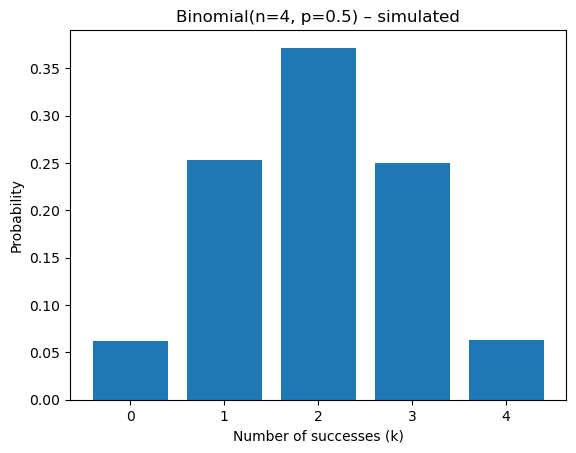

In [18]:
from collections import Counter
# Parameters
n = 4
p = 0.5
num_draws = 100_000  # large sample to approximate the distribution

# Simulate
samples = np.random.binomial(n=n, p=p, size=num_draws)

# Empirical probabilities
counts = Counter(samples)
xs = sorted(counts.keys())
probs = [counts[x] / num_draws for x in xs]

# Plot
plt.bar(xs, probs, tick_label=xs)
plt.xlabel("Number of successes (k)")
plt.ylabel("Probability")
plt.title("Binomial(n=4, p=0.5) – simulated")
plt.show()

In [19]:
def mc_ex_x2_poisson(lam=2.0, N=200_000, seed=123):
    """
    Monte Carlo estimate of E[X^2] where X ~ Poisson(lam).
    Returns (estimate, std_error, exact).
    """
    rng = np.random.default_rng(seed)
    x = rng.poisson(lam=lam, size=N)
    g = x**2

    est = g.mean()
    # Monte Carlo standard error of the mean estimator
    se = g.std(ddof=1) / np.sqrt(N)

    exact = lam + lam**2  # E[X^2] for Poisson(lam)
    return est, se, exact

if __name__ == "__main__":
    est, se, exact = mc_ex_x2_poisson(lam=2.0, N=200_000, seed=123)
    print(f"Monte Carlo estimate of E[X^2]: {est:.4f}")
    print(f"Monte Carlo standard error    : {se:.4f}")
    print(f"Exact E[X^2] (λ+λ^2)          : {exact:.4f}")

Monte Carlo estimate of E[X^2]: 6.0006
Monte Carlo standard error    : 0.0170
Exact E[X^2] (λ+λ^2)          : 6.0000
